# Phase-1 IndiaMART Hackathon
This notebook is our a working prototype solution to gauge the appropriate unit wise price range for the 3 categories(Gloves,Kurtas,Drills) based on their units by removing outliers from the data.

**Instructions for running this notebook**


*   Jupyter notebook is needed to run this notebook if it is not available Please use Colab from google  to run it.
*   required libraries to run this notebook are pandas,numpy,seaborn and scipy.
*   Incase you are running this notebook please make sure all **.csv** files are uploaded 











In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.signal import argrelextrema
from scipy import stats

we can import the required data either from the folder or our git repository.
The given .xlsx file is split into Three parts and and converted to .csv file which is easy to handle.

In [0]:
try:
  drilldf = pd.read_csv('./phaseone-drill.csv')
  glovedf = pd.read_csv('./phaseone-gloves.csv')
  kurtadf = pd.read_csv('./phaseone-kurta.csv')
except:
  try:
    drilldf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-drill.csv')
    glovedf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-gloves.csv')
    kurtadf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-kurta.csv')
  except:
    print("no file found and no internet connection")


the following piece of code prints out all unique units of the three item given

In [78]:
drill_units=drilldf['Unit'].unique()
print(drill_units,'drills')
glove_units=glovedf['Unit'].unique()
print(glove_units,'gloves')
kurta_units=kurtadf['Unit'].unique()
print(kurta_units,'kurtas')

['Piece' 'Piece(s)' 'pack' 'unit' 'Number' 'Unit' 'Pack' '1nos' 'Unit(s)'
 'kit' 'Set' 'Pc_Onwards' 'ONWARDS' 'Kit'] drills
['Pair' 'Piece' 'pack' 'Unit' 'Pack' 'Unit/Onwards' 'Pair(s)' 'unit' 'Set'
 'Pieces'] gloves
['Piece' 'dollar' 'Packet' 'piece' 'Meter' 'Piece(s)' 'Set' 'Per piece'
 'Unit' '1' '1pc' 'Box' '170 per peice' 'Unstitch' 'Barrel' 'Carton'
 'peice' 'Pieces' 'Sets' 'Unit(s)' 'one' 'Bag' 'Selfie Kurtis' 'Pack'
 'Pair' 'Pound' 'Peice' '1piece' 'No' 'Kilogram' 'Number' "40' Container"
 'pack' '100 pic' 'Year' "20' Container" 'Pcs' 'Piece(s) Onwards' 'One'
 'kurtI' 'Ounce' 'onwards' '10-10000' 'per piese' 'Day' 'Set(s)'
 '12 units' '1pis' 'Onwards' 'One peace' 'Set(S)' 'Pair piece' 'Ounce(s)'
 'Packet(s)' 'Single' 'one pcs' 'Pc' '4 pcs' '4 units' '5' 'set' 'kurti'
 'pcs' 'pices' 'Pics' 'single piece' 'pi' 'per piece' 'Kurti' 'one unit'
 '1 piece' '1 pice' 'Suit' 'pair piece' '10' 'pieces' '1pcs' '1 pc'
 '3 set' 'Xl size' '1000 per unit' '1pcd' 'Psc' 'Gram' 'Rs' 'in' '1 pcs'


The following three cells prints out the count of each unique unts.

In [79]:
drilldf['Unit'].value_counts()

Piece         119
pack           47
unit           25
Unit           17
Number         14
Pack            9
Piece(s)        5
Pc_Onwards      5
1nos            1
kit             1
Set             1
Kit             1
ONWARDS         1
Unit(s)         1
Name: Unit, dtype: int64

In [80]:
glovedf['Unit'].value_counts()

Pair            113
unit              9
Piece             6
pack              5
Pack              3
Unit              3
Pair(s)           2
Pieces            1
Set               1
Unit/Onwards      1
Name: Unit, dtype: int64

In [81]:
kurtadf['Unit'].value_counts()


Piece               3334
Piece(s)             500
1                     76
Unit                  63
Set                   43
Onwards               39
piece                 38
No                    37
Bag                   23
Number                23
Pair                  17
Pieces                13
Pack                  13
Unit(s)               11
onwards                9
Box                    9
20' Container          6
Set(s)                 5
40' Container          5
Packet                 4
Ounce                  4
kurti                  3
Meter                  3
1pc                    3
1piece                 3
one                    3
peice                  3
Psc                    3
pices                  2
Pics                   2
                    ... 
Selfie Kurtis          1
pi                     1
per piece              1
1 piece                1
Pound                  1
10-10000               1
170 per peice          1
Feet                   1
Carton                 1


In [82]:
kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)')) & (kurtadf['Price'] < 10000)]['Unit'].value_counts()

Piece       3323
Piece(s)     500
Name: Unit, dtype: int64

# Calculating Z-score
Z-score is meausure of how much given sample is deviating compared to Standaed deviation.
In python the function is available in scipy.stats which we are using in the following cells

**note:**we are calculating only abolsolute values as sign of z-score doesn't matter in finding outliers






In [0]:
drill_z = np.abs(stats.zscore(drilldf['Price']))
glove_z = np.abs(stats.zscore(glovedf.loc[glovedf['Unit']=='Pair']['Price']))
kurta_z = np.abs(stats.zscore(kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))]['Price']))

After obtaing z-score we are not considering all entries whse z-score is greater than 3 or less than -3 and also we are considering only some units values as unit conversion is not as indicative as the sugar example given.

In [0]:
drill_ol=drilldf[(drill_z < 3)]
npa=drilldf[(drill_z < 3)]['Price']
npa1=glovedf.loc[glovedf['Unit']=='Pair'][(glove_z < 3)]['Price']
npa2=kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))][(kurta_z < 3)]['Price'][:-1]

In [133]:
kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))][(kurta_z < 3)].describe()

,Price
count,3821.000000
mean,696.981942
std,675.809564
min,1.000000
25%,325.000000
50%,500.000000
75%,800.000000
max,6589.000000


The following cell is used to store standard deviation which is very important to calculate the bandwidth in later part

In [89]:
stdev=np.std(npa)
stdev1=np.std(npa1)
stdev2=np.std(npa2)
print(stdev,stdev1,stdev2)

5765.5323498379985 64.60411168657322 669.0502683105965


# Kernel Density estimation method for calculation of Probabilty Disribution Function
we are using probability distribution function for find ing require range as pdf is more suitable for finding relationship in general population.

kernel Density Estimation is useful method for calculating pdf from discret samples.



In [0]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

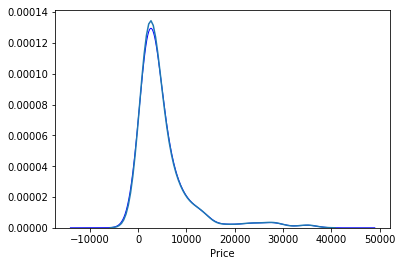

In [124]:
y_grid=np.linspace(np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,np.amax(npa)+(np.amax(npa)-np.amin(npa))*0.4,10000)
ideal=1.06*(np.std(npa))*((len(npa)**(-1/5)))
pdf = kde_scipy(npa, y_grid, bandwidth=ideal)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)
sns.distplot(drill_ol['Price'],hist=False,kde=True)
plt.show()

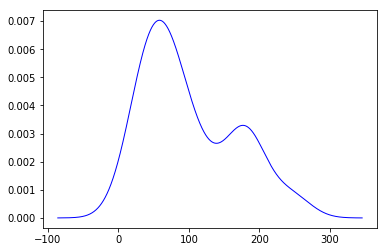

In [125]:
y_grid1=np.linspace(np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4,np.amax(npa1)+(np.amax(npa1)-np.amin(npa1))*0.4,10000)
ideal1=1.06*(np.std(npa1))*((len(npa1)**(-1/5)))
pdf1 = kde_scipy(npa1, y_grid1, bandwidth=ideal1)
plt.plot(y_grid1, pdf1, color='blue', alpha=1, lw=1)

In [117]:
(np.amax(npa2)-np.amin(npa2))*0.4

2599.6000000000004

In [1]:
y_grid2=np.linspace(-(np.amax(npa2)-np.amin(npa2))*0.05,np.amax(npa2)*1.05,10000)
ideal2=1.06*(np.std(npa2))*((len(npa2)**(-1/5)))
pdf2 = kde_scipy(npa2, y_grid2, bandwidth=ideal2)
plt.plot(y_grid2, pdf2, color='blue', alpha=1, lw=1)


NameError: ignored

In [123]:
w=((np.amax(npa)-np.amin(npa))*1.8)/1000
w1=((np.amax(npa1)-np.amin(npa1))*1.8)/1000
w2=((np.amax(npa2)-np.amin(npa2))*0.05+np.amax(npa2)+(np.amax(npa2)-np.amin(npa2))*1)/1000
print(np.sum(pdf)*w,np.sum(pdf1)*w1,np.sum(pdf2)*w2)

0.9989999999999476 0.9989895031714772 0.9989626965229761


In [96]:
pdf_area=np.zeros(len(pdf)-1)
for a in range(len(pdf_area)):
  pdf_area[a]=(pdf[a]+pdf[a+1])*(w/2)
print(np.sum(pdf_area))

0.9989999999999413


In [97]:
f_peak=argrelextrema(pdf, np.greater)[0][0]
for q in range(f_peak):
  if np.sum(pdf[f_peak-q:f_peak+q])*w > 0.5:
    print(np.sum(pdf[f_peak-q:f_peak+q])*w,q)
    break
print((f_peak-q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,(f_peak+q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4)

0.5051455892006677 35
428.97559999999976 4838.723600000001


In [98]:
f_peak1=argrelextrema(pdf1, np.greater)[0][0]
q=0
for q in range(f_peak1):
  if np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1 > 0.5:
    print(np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1,q)
    break
print((f_peak1-q)*w1,(f_peak1+2*q)*w1)

0.5026509161057199 67
115.344 202.176


In [99]:
f_peak2=argrelextrema(pdf2, np.greater)[0][0]
for q in range(f_peak2):
  if np.sum(pdf2[f_peak2-q:f_peak2+q])*w2 > 0.6:
    print(np.sum(pdf2[f_peak2-q:f_peak2+q])*w2,q)
    break
print((f_peak2-q)*w2+np.amin(npa2),(f_peak2+q)*w2+np.amin(npa2))

0.6037672753033876 45
14.0 599.0


In [100]:
qq1=len(pdf)
for q in range(len(pdf)):
  for p in range(len(pdf)-(q+1)):
     if np.sum(pdf[p:p+q+1])*w > 0.5:
        print(np.sum(pdf[p:p+q+1])*w,p,q)
        break
  if np.sum(pdf[p:p+q+1])*w > 0.5:
    print(np.sum(pdf[p:p+q+1])*w,p,q)
    break
print((p)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,(p+q+1)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4)  
     
        

0.5002990797551726 231 68
0.5002990797551726 231 68
554.9683999999997 4901.720000000001


In [101]:
qq2=len(pdf1)
for q in range(len(pdf1)):
  for p in range(len(pdf1)-(q+1)):
     if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
        print(np.sum(pdf1[p:p+q+1])*w1,p,q)
        break
  if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
    print(np.sum(pdf1[p:p+q+1])*w1,p,q)
    break
print((p)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4,(p+q+1)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4)  
 

0.5000234198382558 237 193
0.5000234198382558 237 193
16.384 100.19200000000001


In [102]:
qq3=len(pdf2)
for q in range(len(pdf2)):
  for p in range(len(pdf2)-(q+1)):
     if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
        print(np.sum(pdf2[p:p+q+1])*w2,p,q)
        break
  if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
    print(np.sum(pdf2[p:p+q+1])*w2,p,q)
    break
print((p)*w2+np.amin(npa2),(p+q+1)*w2+np.amin(npa2))

0.6000918485533974 25 73
0.6000918485533974 25 73
163.5 644.5


In [103]:
aqw=np.zeros(6)
aqw[1:2]

array([0.])

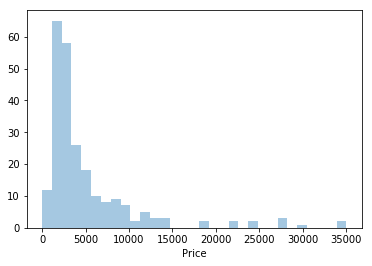

In [104]:
sns.distplot(drill_ol['Price'],kde=False)

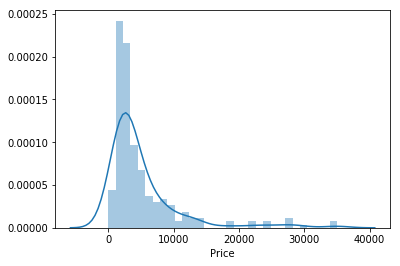

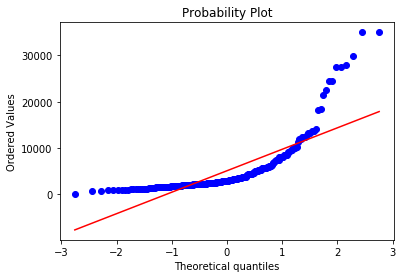

In [105]:
sns.distplot(drill_ol['Price']);
fig = plt.figure()
res = stats.probplot(drill_ol['Price'], plot=plt)

In [106]:
plt.scatter(drill_ol['Price'],array);

NameError: ignored

In [0]:
array=np.arange(len(drill_ol))+1;array